In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
from scipy import signal as sps
import seaborn as sns

In [37]:
names=['Plane','Time','Elapsed (ms)']
df=pd.read_table('C:\\Users\Annie\Desktop\\160621_1_Notepad\\20.txt',skiprows=4)
names.extend([col for col in df.columns if 'G PMT' in col])
df=df.loc[df.Plane != 0,df.columns.isin(names)]

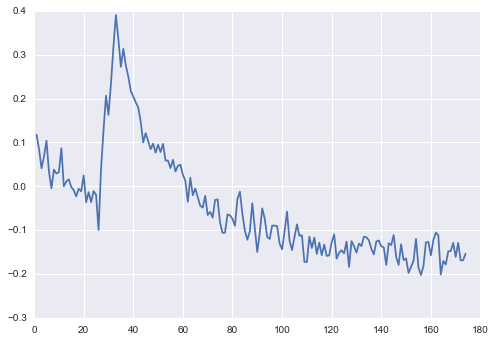

In [194]:
# odf is the original dataframe, only G PMT columns in this dataframe
odf=df[[col for col in df.columns if 'G PMT' in col]]
# Divided is DF/F for first column
baseline=pd.DataFrame(odf.iloc[5:26,2]).mean();
example=pd.DataFrame(odf.iloc[:,2]);
temp=example.subtract(baseline);
divided=temp.divide(baseline);
plt.figure();
plt.plot(divided);

# Get the best fit (on Intensity values)

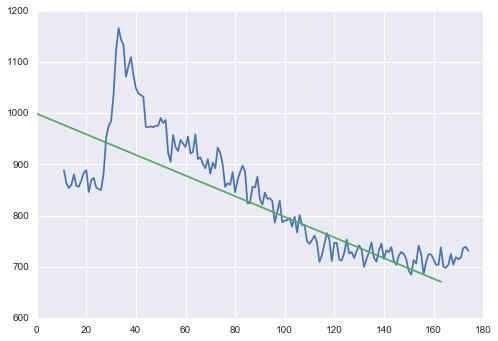

In [257]:
t=odf.iloc[10:174,0];
plt.plot(t);
u=np.polyfit(np.arange(len(t)),t,1);
plt.plot(np.poly1d(u)(np.arange(len(t))));

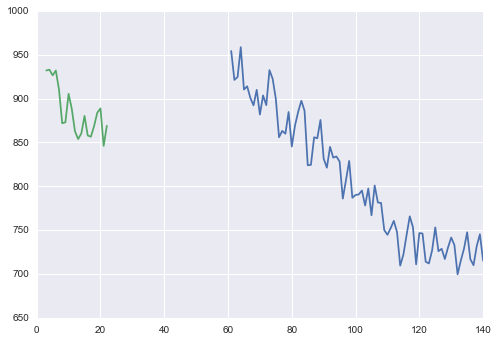

In [258]:
#testing out on G(PMT)1 of the odf - NOT DF/F BUT INTENSITY
a=odf.iloc[2:22,0]
x=np.arange(len(odf.iloc[60:140,0]))
y=odf.iloc[60:140,0]
plt.plot(y);
plt.plot(a);
z=np.polyfit(x,y,2)
p = np.poly1d(z)

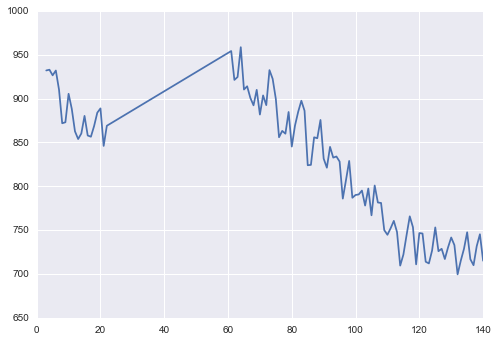

In [263]:
b=a.append(y);
plt.plot(b);
c=np.polyfit(x,y,1);
d=np.poly1d(c);

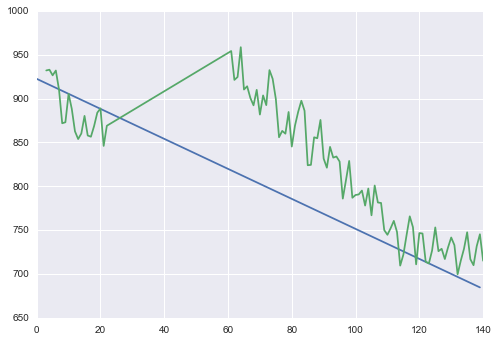

In [264]:
xp=np.linspace(1,80,140)
plt.plot(d(xp));
plt.plot(b);

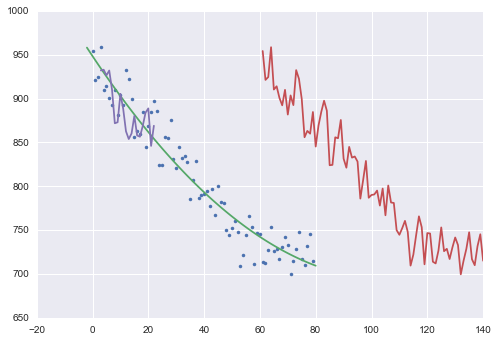

In [265]:
xp = np.linspace(-2, 80, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-')
plt.plot(y);
plt.plot(a);

# Best fit on first and last part of DF/F values

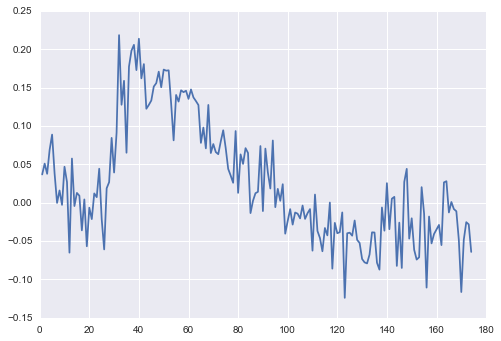

In [334]:
# odf is the original dataframe, only G PMT columns in this dataframe
odf=df[[col for col in df.columns if 'G PMT' in col]]
# Divided is DF/F for first column
baseline=pd.DataFrame(odf.iloc[5:26,10]).mean();
example=pd.DataFrame(odf.iloc[:,10]);
temp=example.subtract(baseline);
divided=temp.divide(baseline);
plt.figure();
plt.plot(divided);

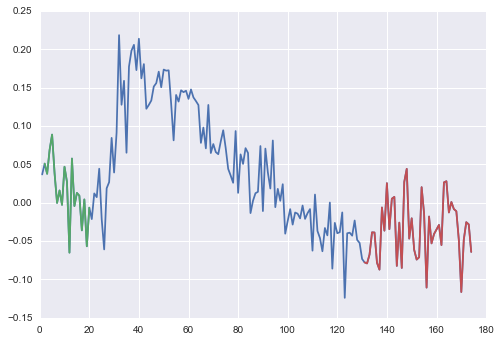

In [335]:
#Get the values of the first and last part
dt=divided.iloc[:,0];
plt.plot(dt);
first=[np.arange(1,20,1),divided.iloc[1:20,0]];
plt.plot(first[1]);
last=[np.arange(130,174,1),divided.iloc[130:174,0]];
plt.plot(last[1]);
firstdf=pd.DataFrame(first).T
lastdf=pd.DataFrame(last).T

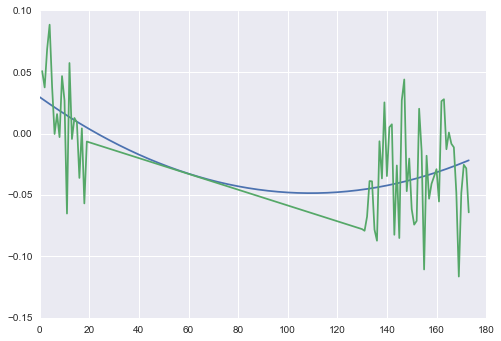

In [336]:
#Make a fit line
temp=firstdf.append(lastdf)
fitline=np.polyfit(temp[0],temp[1],2);
tmp=np.poly1d(fitline)
plt.plot(tmp(np.arange(len(dt))));
plt.plot(temp[0],temp[1]);

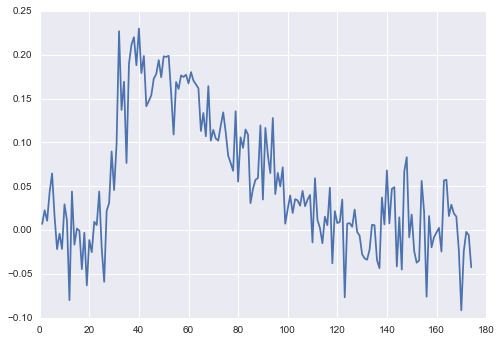

In [338]:
#Get dtrended values
fitvalues=tmp(np.arange(len(dt)))
detrended=np.subtract(dt,fitvalues)
plt.plot(detrended);
# plt.plot(dt);

# Get Best Fit (On DF/F values)

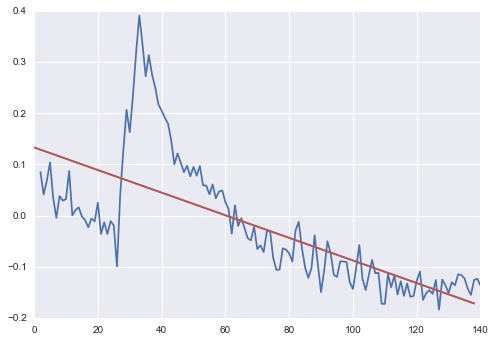

In [254]:
dt=divided.iloc[1:140,0];
plt.plot(dt);
ut=np.polyfit(np.arange(len(dt)),dt,1);
plt.plot(np.poly1d(ut)(np.arange(len(dt))));
tmp=np.poly1d(ut)
plt.plot(tmp(np.arange(len(dt))));

In [229]:
detrended=np.subtract(dt,tmp(np.arange(len(dt))))

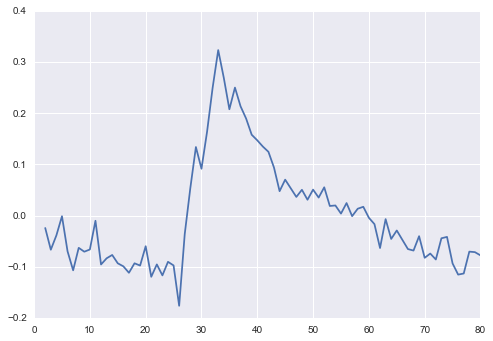

In [230]:
plt.plot(detrended);

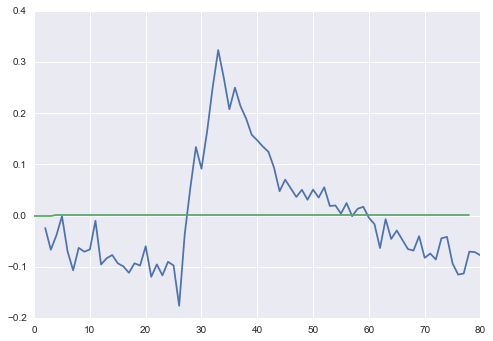

In [233]:
dtemp=detrended;
plt.plot(dtemp);
utemp=np.polyfit(np.arange(len(dtemp)),dtemp,1);
plt.plot(np.poly1d(utemp)(np.arange(len(dtemp))));

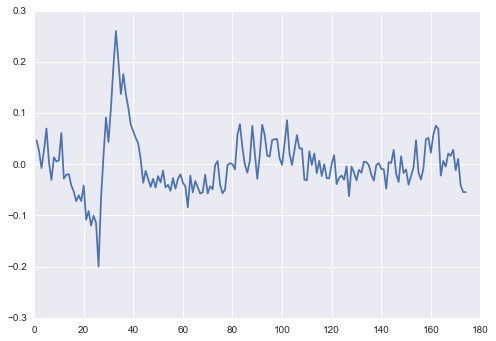

In [208]:
tmp=np.poly1d(utemp);
# plt.plot(tmp(np.arange(len(dtemp))));
values=tmp(np.arange(len(dtemp)));
second_detrend=dtemp.subtract(values)
plt.plot(second_detrend)

# dt=divided.iloc[:,0];
# plt.plot(dt);
# ut=np.polyfit(np.arange(len(dt)),dt,1);
# plt.plot(np.poly1d(ut)(np.arange(len(dt))));
# tmp=np.poly1d(ut)
# plt.plot(tmp(np.arange(len(dt))));

# Filtfilt on DF/F

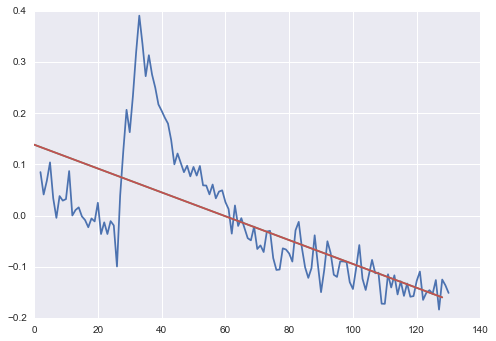

In [240]:
dt=divided.iloc[1:130,0];
plt.plot(dt);
ut=np.polyfit(np.arange(len(dt)),dt,1);
plt.plot(np.poly1d(ut)(np.arange(len(dt))));
tmp=np.poly1d(ut)
plt.plot(tmp(np.arange(len(dt))));

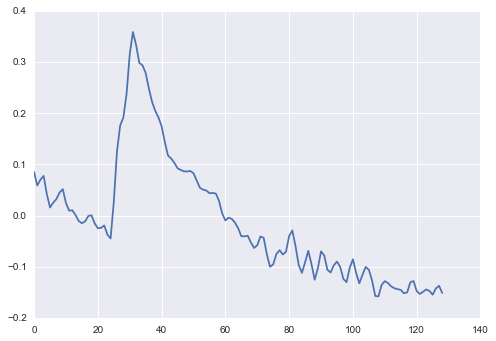

In [252]:
b,a=sps.butter(1,0.5)
y=sps.filtfilt(b,a,dt)
plt.plot(y)

# Butterworth filter

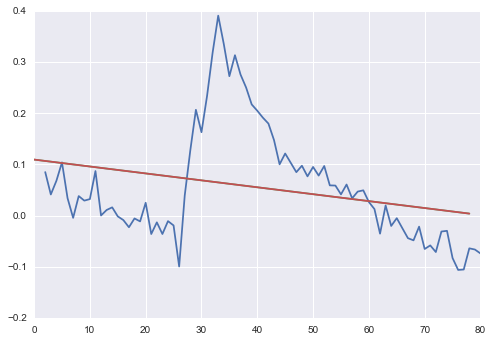

In [234]:
dt=divided.iloc[1:80,0];
plt.plot(dt);
ut=np.polyfit(np.arange(len(dt)),dt,1);
plt.plot(np.poly1d(ut)(np.arange(len(dt))));
tmp=np.poly1d(ut)
plt.plot(tmp(np.arange(len(dt))));

In [182]:
# # t = np.linspace(np.arange())
# x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1)
# ...      + 0.18*np.cos(2*np.pi*3.85*t))
# >>> xn = x + np.random.randn(len(t)) * 0.08

In [237]:
b,a=sps.butter(3,0.5)
zi=sps.lfilter_zi(b,a)
z,_=sps.lfilter(b,a,z,zi=zi*z[0])
y=sps.filtfilt(b,a,dt)

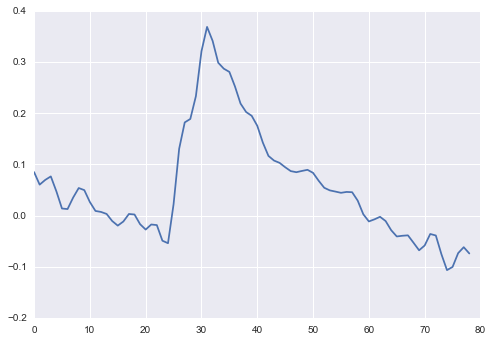

In [238]:
plt.plot(y);

In [175]:
# sps.lfilter(dt,np.arange(len(dt)),)